In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Cargar el dataset
df = sns.load_dataset('penguins')
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [2]:
#@title 1. ¿Cuántas especies diferentes de pingüinos hay en el dataset? ¿Que caracteristicas de los pinguinos se dan para cada especie?

numesp = df.groupby('species')

especies = list(numesp.groups.keys())

print("Hay" ,len(list(numesp.groups.keys())),"diferentes especies de pinguinos en el dataset, que son: ", list(numesp.groups.keys()),)
print("Las caracteristicas que se muestran para cada pinguino son :", list(df.columns))


Hay 3 diferentes especies de pinguinos en el dataset, que son:  ['Adelie', 'Chinstrap', 'Gentoo']
Las caracteristicas que se muestran para cada pinguino son : ['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']


In [3]:
#@title 2.¿Hay valores faltantes en las variables? Determine una estrategia de limpieza y apliquela.

val_vacios = df.isnull().sum()
print( "En numero de valores faltantes por culumna es:  ", val_vacios)

dfl = df.dropna()   # Un metodo de limpieza seria eliminar las filas con datos nulos del df.




En numero de valores faltantes por culumna es:   species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


In [102]:
#@title 3.¿Cuál es la isla con mayor número de pingüinos en el dataset? ¿Hay un desbalance en número en el número de pinguinos por isla?

numxisl = dfl.groupby('island').size()

print('La isla con mayor numero de pinguinos es: ', numxisl.idxmax())

numxisldf = pd.DataFrame(numxisl)
numxisldf.columns = ['Numero de pinguinos']

print(numxisldf)
print('De la tabla podemos observar que hay una clara diferencia en la cantidiad de pinguinos en cada isla, \nsiendo Torgersen la isla que mas difiere en cantidad respecto a las otras')

La isla con mayor numero de pinguinos es:  Biscoe
           Numero de pinguinos
island                        
Biscoe                     163
Dream                      123
Torgersen                   47
De la tabla podemos observar que hay una clara diferencia en la cantidiad de pinguinos en cada isla, 
siendo Torgersen la isla que mas difiere en cantidad respecto a las otras


In [103]:
#@title 4. Repita la pregunta anterior observando las especies.

numxesp = dfl.groupby('species').size()


print('La especie con mayor numero de pinguinos es: ',numxesp.idxmax())

numxespdf = pd.DataFrame(numxesp)
numxespdf.columns = ['Numero de pinguinos']
print(numxespdf)
print('De la tabla podemos observar una diferencia en la cantidiad de pinguinos de cada especie, \nsiendo Chinstrap la especie que mas difiere en cantidad respecto a las otras')

La especie con mayor numero de pinguinos es:  Adelie
           Numero de pinguinos
species                       
Adelie                     146
Chinstrap                   68
Gentoo                     119
De la tabla podemos observar una diferencia en la cantidiad de pinguinos de cada especie, 
siendo Chinstrap la especie que mas difiere en cantidad respecto a las otras


In [104]:
#@title 5. ¿Cuál es la longitud media y la desviacion estandar del tamaño del pico de los pingüinos por especie?

xesp_largopico= dfl.groupby('species')['bill_length_mm'].agg(['mean','std'])
xesp_largopico

xesp_largopico

,mean,std
species,,
Adelie,38.823973,2.662597
Chinstrap,48.833824,3.339256
Gentoo,47.568067,3.106116


In [105]:
#@title 6. ¿Qué pingüino tiene el pico más largo en el dataset y cuál es su especie?

longitud_max = dfl["bill_length_mm"].max()
especie_max = dfl.loc[dfl["bill_length_mm"].idxmax(), "species"]

print("El pico más largo mide:", longitud_max, "mm", "es de la especie:", especie_max)



El pico más largo mide: 59.6 mm es de la especie: Gentoo


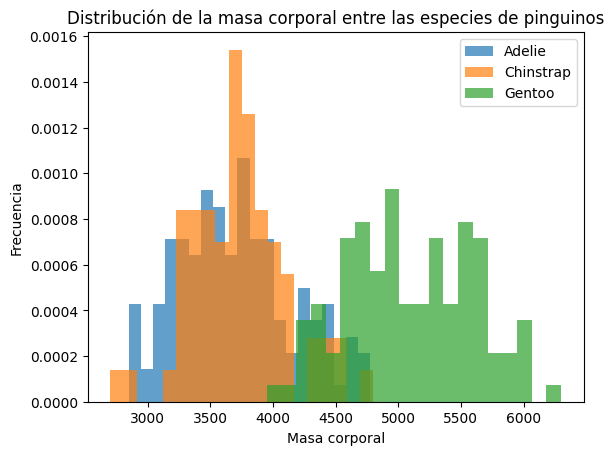

In [106]:
#@title 7. ¿Como es la distribución de la masa corporal entre las especies de pingüinos

for el in especies:
  plt.hist(list(dfl[dfl["species"] == el]["body_mass_g"]), bins=20, alpha=0.7, label=el,density = True)

plt.legend()
plt.xlabel("Masa corporal")
plt.ylabel("Frecuencia")
plt.title("Distribución de la masa corporal entre las especies de pinguinos")
plt.show()

                  mean         std
species                           
Adelie     3706.164384  458.620135
Chinstrap  3733.088235  384.335081
Gentoo     5092.436975  501.476154
En este caso se usaron los parametros estadisticos para aproximar los resultados a una distribucion normal, 
se puede ver que la distribución se adapta parcialmente a los resultados, 
se podria hacer un analisis mejor para encntra una distribucion que se ajuste mas


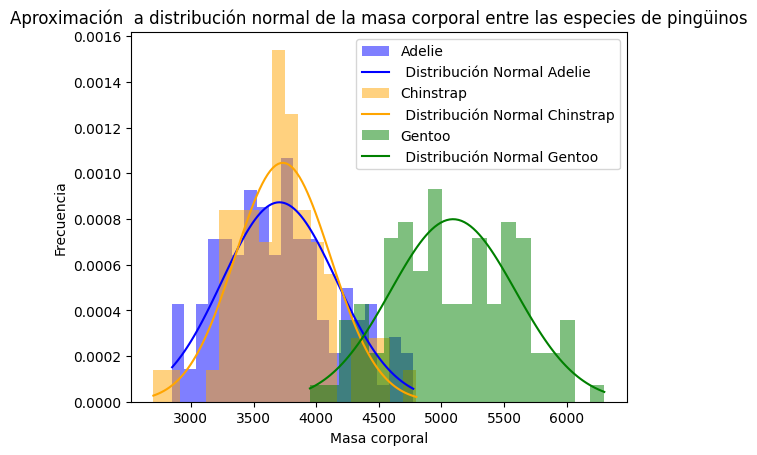

In [109]:
#@title 8. Describa la distribucion con ayuda de la media, desviacion estandar

from scipy.stats import norm

xesp_masa= dfl.groupby('species')['body_mass_g'].agg(['mean','std'])
print(xesp_masa)

colores = ['Blue', 'Orange', 'Green']

for i in range(len(especies)):

  especie = list(dfl[dfl["species"] == especies[i]]["body_mass_g"])
  xnorm = np.linspace (min(especie), max(especie), 100)
  ynorm = norm.pdf(xnorm, np.mean(especie), np.std(especie))

  plt.hist(especie, alpha=0.5, bins=20, label=especies[i] , density=True, color= colores[i])
  plt.plot(xnorm,ynorm, color = colores[i], label=f' Distribución Normal {especies[i]}')

plt.legend()
plt.xlabel("Masa corporal")
plt.ylabel("Frecuencia")
plt.title("Aproximación  a distribución normal de la masa corporal entre las especies de pingüinos")

print('En este caso se usaron los parametros estadisticos para aproximar los resultados a una distribucion normal, \nse puede ver que la distribución se adapta parcialmente a los resultados, \nse podria hacer un analisis mejor para encntra una distribucion que se ajuste mas')

In [110]:
#@title 9. ¿Cuál es la diferencia en masa corporal promedio y desviacion estandard entre machos y hembras?

xsex_masa= dfl.groupby('sex')['body_mass_g'].agg(['mean','std'])
xsex_masa


,mean,std
sex,,
Female,3862.272727,666.172050
Male,4545.684524,787.628884


In [111]:
#@title 10. ¿Cuál es la media y la desviación estándar de la longitud de la aleta de los pingüinos por especie?

xesp_aleta= dfl.groupby('species')['flipper_length_mm'].agg(['mean','std'])
xesp_aleta

,mean,std
species,,
Adelie,190.102740,6.521825
Chinstrap,195.823529,7.131894
Gentoo,217.235294,6.585431


In [112]:
#@title 11. ¿Cuál es la longitud mínima y máxima de la aleta entre las tres especies de pingüinos?

minxesp_aleta= dfl.groupby('species')['flipper_length_mm'].agg(['min','max'])
minxesp_aleta


,min,max
species,,
Adelie,172.0,210.0
Chinstrap,178.0,212.0
Gentoo,203.0,231.0


In [113]:
#@title 12. ¿Cómo varía la longitud del pico entre las diferentes especies de pingüinos en las distintas islas?

xespxisl_largopico= dfl.groupby(['island','species'])['bill_length_mm'].agg(['mean','std'])
xespxisl_largopico

mean       std
island    species                       
Biscoe    Adelie     38.975000  2.480916
          Gentoo     47.568067  3.106116
Dream     Adelie     38.520000  2.484276
          Chinstrap  48.833824  3.339256
Torgersen Adelie     39.038298  3.028097

In [114]:
#@title 13. ¿Cuál es la isla con la mayor variación en la longitud del pico entre las tres especies de pingüinos?

varxisl= xespxisl_largopico["mean"].groupby("island").apply(lambda x: x.max() - x.min())

print(" La isla con mayor variación es:", varxisl.idxmax())

 La isla con mayor variación es: Dream


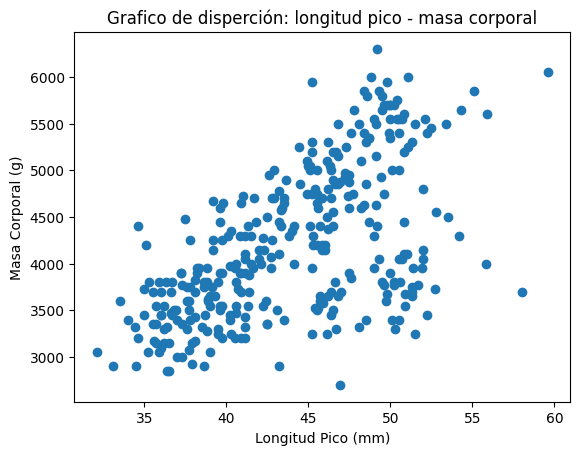

No se ve relacion entre ambas variables, 
sin embargo se requiere ver el coeficiente de correlación y hacer test de hipotesis para ser mas preciso con el analisis


In [115]:
#@title 14. ¿Cuál es la relación entre la longitud del pico y la masa corporal de los pingüinos? ¿Cambia esa relación si se mira por especie? Utilice diagramas de dispersión para visualizarlos.

plt.plot(list(dfl['bill_length_mm']),list(dfl['body_mass_g']),'o')
plt.xlabel("Longitud Pico (mm)")
plt.ylabel("Masa Corporal (g)")
plt.title("Grafico de disperción: longitud pico - masa corporal")
plt.show()

print('No se ve relacion entre ambas variables, \nsin embargo se requiere ver el coeficiente de correlación y hacer test de hipotesis para ser mas preciso con el analisis')

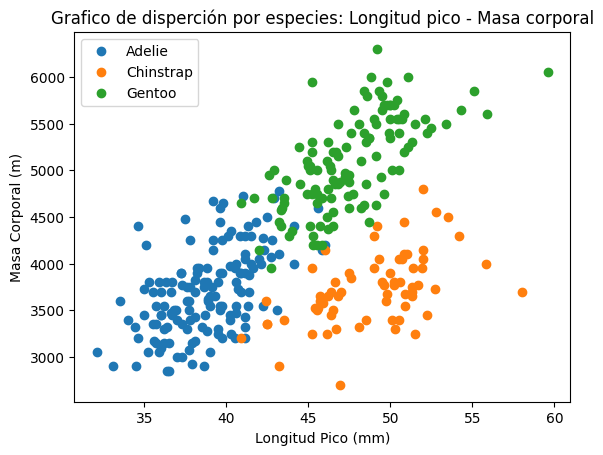

Por especies si se pueden ver algunas tendencias de relacion, especialmente de correlacion positiva, 
de nuevo se requiere calcular el coeficiente de correlación y hacer test de hipotesis para ser mas preciso con el analisis


In [116]:
#@title 14. ¿Cambia esa relación si se mira por especie?

for el in especies:
  plt.plot(list(dfl[dfl["species"] == el]["bill_length_mm"]),list(dfl[dfl["species"] == el]["body_mass_g"]), 'o',label=el)
plt.legend()
plt.xlabel("Longitud Pico (mm)")
plt.ylabel("Masa Corporal (m)")
plt.title("Grafico de disperción por especies: Longitud pico - Masa corporal")
plt.show()

print('Por especies si se pueden ver algunas tendencias de relacion, especialmente de correlacion positiva, \nde nuevo se requiere calcular el coeficiente de correlación y hacer test de hipotesis para ser mas preciso con el analisis')

In [117]:
#@title 15. ¿Existe una correlación significativa entre la longitud del pico y la masa corporal en las diferentes especies de pingüinos?

corr = []
for el in especies:
  corr.append([el ,np.corrcoef(list(dfl[dfl["species"] == el]["body_mass_g"]), list(dfl[dfl["species"] == el]["flipper_length_mm"]))[1,0]])

print(pd.DataFrame(corr, columns=['Especie', 'Correlación']))
print('Como se habia intuido hay correlacion posistiva entre las variables longitud pico y masa corporal por especie, \nla mayor es para la especie Gentoo, faltaria hacer un test de hipotesis para descartar que la correlacion sea producto de la aleatoriedad')

     Especie  Correlación
0     Adelie     0.464854
1  Chinstrap     0.641559
2     Gentoo     0.711305
Como se habia intuido hay correlacion posistiva entre las variables longitud pico y masa corporal por especie, 
la mayor es para la especie Gentoo, faltaria hacer un test de hipotesis para descartar que la correlacion sea producto de la aleatoriedad


In [118]:
#@title 16. ¿Cuál es la relación entre el sexo y la longitud de la aleta en los pingüinos por especie?


xespxsex_aleta= dfl.groupby(['species','sex'])['flipper_length_mm'].agg(['mean','std'])
xespxsex_aleta

mean       std
species   sex                         
Adelie    Female  187.794521  5.595035
          Male    192.410959  6.599317
Chinstrap Female  191.735294  5.754096
          Male    199.911765  5.976558
Gentoo    Female  212.706897  3.897856
          Male    221.540984  5.673252

In [120]:
#@title 17. Escoja una de las tendencias que haya observado en la cual haya una correlación entre las variables y ahora con un test de hipótesis determine si esta correlación puede ser explicada por aleatoriedad. Para esta pregunta puede usar las relaciones del libro "Probabilidad y Estadistica" de Marques de Cantu sección 12.6 donde hay un ejemplo 12.8 que les guia como usar las expresiones y hacer las conclusiones.

#Se eligio Hacer el test a la correlacion entre la longitud del pico y la masa corporal de los iguinos de la especie Gentoo
# En ese caso la hipotesis nula seria H0: No hay correlacion entre las variables
# la hipotesis alternativa saria: existe una correlacion entre las variables

from scipy import stats

r, p_valor = stats.pearsonr(list(dfl[dfl["species"] == 'Gentoo']["body_mass_g"]),  list(dfl[dfl["species"] == 'Gentoo']["flipper_length_mm"]))

alpha = 0.05               #intervalo de confianza del

print('Se eligio Hacer el test a la correlacion entre la longitud del pico y la masa corporal de los pinguinos de la especie Gentoo \nEn ese caso la hipotesis nula seria H0: No hay correlacion entre las variables \nla hipotesis alternativa saria: existe una correlacion entre las variables ')
if p_valor < alpha:
    print('Como resultado del test se obtuvo: ',p_valor,'<',alpha,'Se rechaza H0, existe correlación')
else:
    print('Como resultado del test se obtuvo: ',p_valor,'>',alpha,'No se rechaza H0, no hay evidencia suficiente de correlación.')

Se eligio Hacer el test a la correlacion entre la longitud del pico y la masa corporal de los pinguinos de la especie Gentoo 
En ese caso la hipotesis nula seria H0: No hay correlacion entre las variables 
la hipotesis alternativa saria: existe una correlacion entre las variables 
Como resultado del test se obtuvo:  1.249397562484916e-19 < 0.05 Se rechaza H0, existe correlación
